# Leaf Classification main Notebook

### Dependencies

In [72]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from utils import * 
from config import *

from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Preparing the Data

In [73]:
train_df = pd.read_csv(TRAIN_CSV_PATH)
# DATA_ORGANIZER(df=train_df,dir = IMAGES_DIR)

In [74]:
train_img = image_dataset_from_directory(directory=TRAIN_IMAGES_DIR,
                                         image_size=IMAGE_SIZE,
                                         color_mode="grayscale")

Found 990 files belonging to 99 classes.


In [75]:
batch = train_img.as_numpy_iterator().next()
class_names = train_img.class_names

print(class_names)

['Acer_Capillipes', 'Acer_Circinatum', 'Acer_Mono', 'Acer_Opalus', 'Acer_Palmatum', 'Acer_Pictum', 'Acer_Platanoids', 'Acer_Rubrum', 'Acer_Rufinerve', 'Acer_Saccharinum', 'Alnus_Cordata', 'Alnus_Maximowiczii', 'Alnus_Rubra', 'Alnus_Sieboldiana', 'Alnus_Viridis', 'Arundinaria_Simonii', 'Betula_Austrosinensis', 'Betula_Pendula', 'Callicarpa_Bodinieri', 'Castanea_Sativa', 'Celtis_Koraiensis', 'Cercis_Siliquastrum', 'Cornus_Chinensis', 'Cornus_Controversa', 'Cornus_Macrophylla', 'Cotinus_Coggygria', 'Crataegus_Monogyna', 'Cytisus_Battandieri', 'Eucalyptus_Glaucescens', 'Eucalyptus_Neglecta', 'Eucalyptus_Urnigera', 'Fagus_Sylvatica', 'Ginkgo_Biloba', 'Ilex_Aquifolium', 'Ilex_Cornuta', 'Liquidambar_Styraciflua', 'Liriodendron_Tulipifera', 'Lithocarpus_Cleistocarpus', 'Lithocarpus_Edulis', 'Magnolia_Heptapeta', 'Magnolia_Salicifolia', 'Morus_Nigra', 'Olea_Europaea', 'Phildelphus', 'Populus_Adenopoda', 'Populus_Grandidentata', 'Populus_Nigra', 'Prunus_Avium', 'Prunus_X_Shmittii', 'Pterocarya_S

### Vizualizing the data

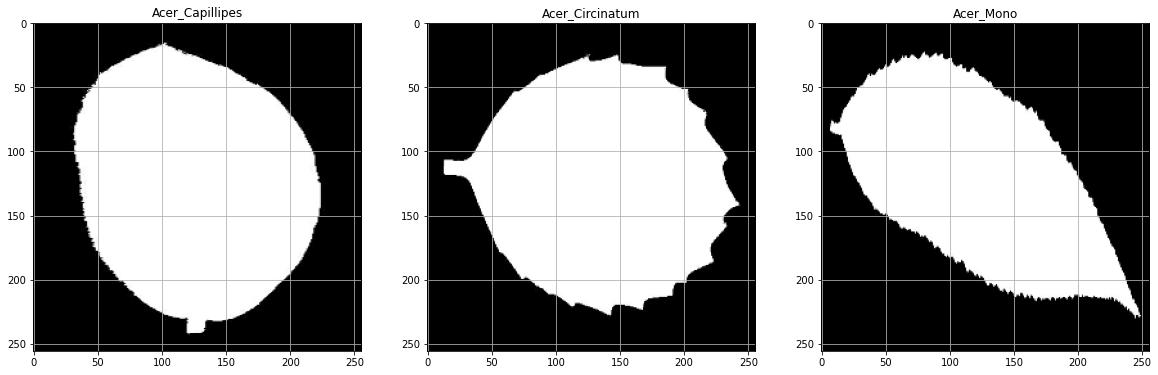

In [71]:
fig,ax = plt.subplots(ncols=3,figsize = (20,20))
for i,img in enumerate(batch[0][:3]):
    ax[i].imshow(img.astype(int),cmap = "gray")
    ax[i].title.set_text(class_names[i])
    ax[i].grid(True)

### Preprocessing the Data

In [13]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=ROTATION_RANGE,
    horizontal_flip=HORIZONTAL_FLIP,
    validation_split=VALIDATION_SPLIT,
    fill_mode=FILMODE
)

preprocessed_train_img = train_datagen.flow_from_directory(
    directory=TRAIN_IMAGES_DIR,
    subset="training",
    shuffle=SHUFFLE_VALUE,
    seed=SEED,
    target_size=IMAGE_SIZE,
    color_mode= COLOR_MODE,
    batch_size=BATCH_SIZE

)

preprocessed_val_img = train_datagen.flow_from_directory(
    directory=TRAIN_IMAGES_DIR,
    subset="validation",
    shuffle=SHUFFLE_VALUE,
    seed=SEED,
    target_size=IMAGE_SIZE,
    color_mode= COLOR_MODE,
    batch_size=BATCH_SIZE

)

Found 792 images belonging to 99 classes.
Found 198 images belonging to 99 classes.
